## Sentiment analysis

In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

from stop_words import get_stop_words
from wordcloud import WordCloud



In [2]:
import warnings
warnings.filterwarnings('ignore')

## Load Data

In [3]:
df_all_reviews = pd.read_csv('data/flipfart_reviews.csv')
df_all_reviews.head()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


In [4]:
df_all_reviews.shape

(9976, 2)

In [5]:
df_all_reviews.rating.value_counts(normalize = True)

5    0.573978
4    0.237069
3    0.088613
1    0.069266
2    0.031075
Name: rating, dtype: float64

In [6]:
df_reviews = pd.DataFrame([])

for rt in df_all_reviews['rating'].unique():
    temp_df = df_all_reviews.loc[df_all_reviews['rating']==rt].sample(n=random.randint(150,299), replace=False, random_state=10)
    df_reviews = pd.concat([df_reviews, temp_df])

In [7]:
df_reviews.shape

(1115, 2)

In [8]:
df_reviews.head()

,review,rating
1281,sound quality amazing Bess Super battery great...,5
5733,Awesome product I just loved itREAD MORE,5
5718,Value for moneySuperb bassBattery backup is be...,5
998,Nice Sound Great quality bass also great. Priz...,5
7388,Good product 👍READ MORE,5


## Data Analysis

[Text(0.5, 1.0, 'Number of reviews per rating'),
 Text(0.5, 0, 'Rating'),
 Text(0, 0.5, 'Count')]

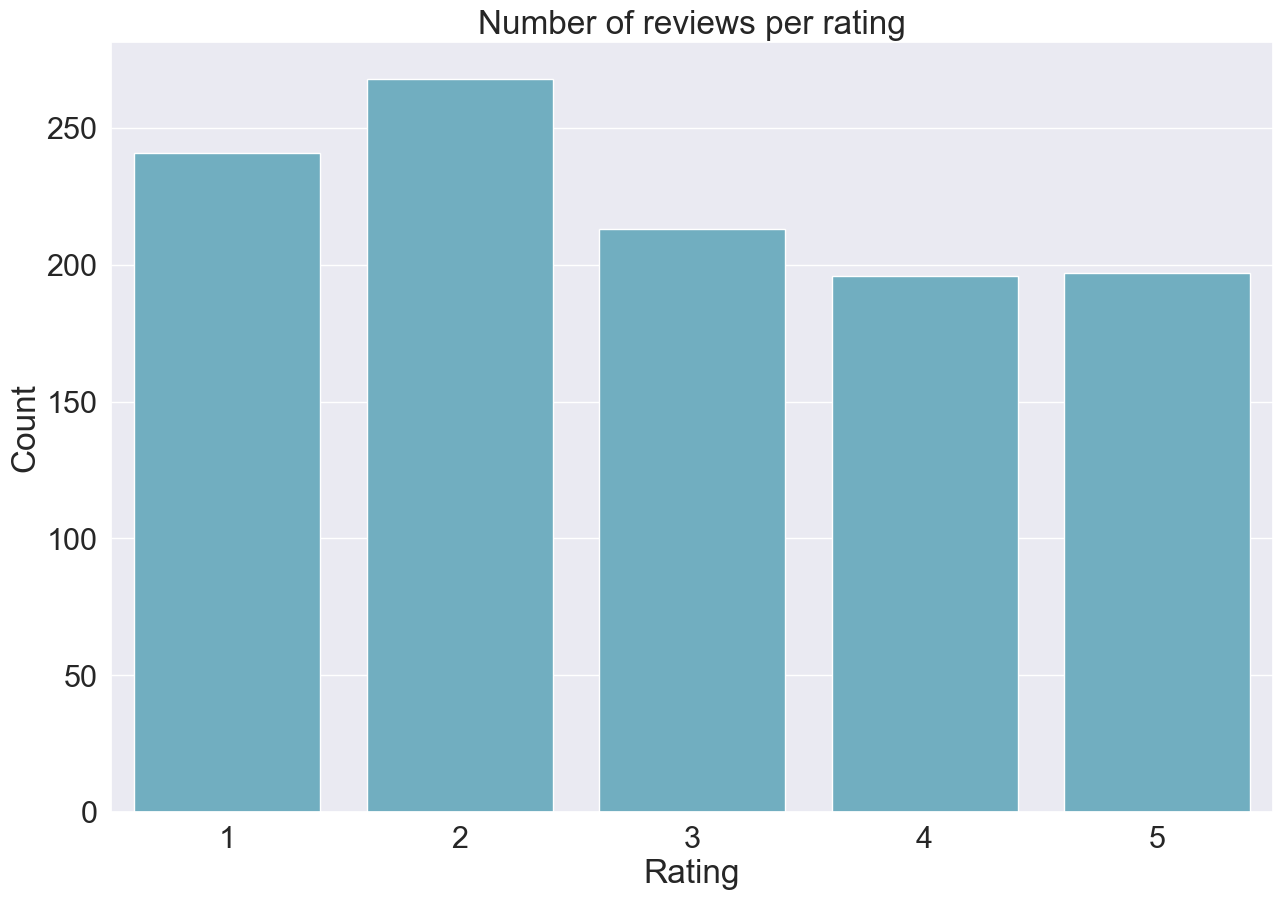

In [9]:
sns.set(rc={'figure.figsize':(15,10)})
sns.set(font_scale=2)

plot = sns.countplot(x='rating', data=df_reviews, color='c')
plot.set(title='Number of reviews per rating', 
         xlabel='Rating', 
         ylabel='Count')

Most reviews seem to be positive but there are quite a bit of 1 ratings, almost as many as 5 ratings.

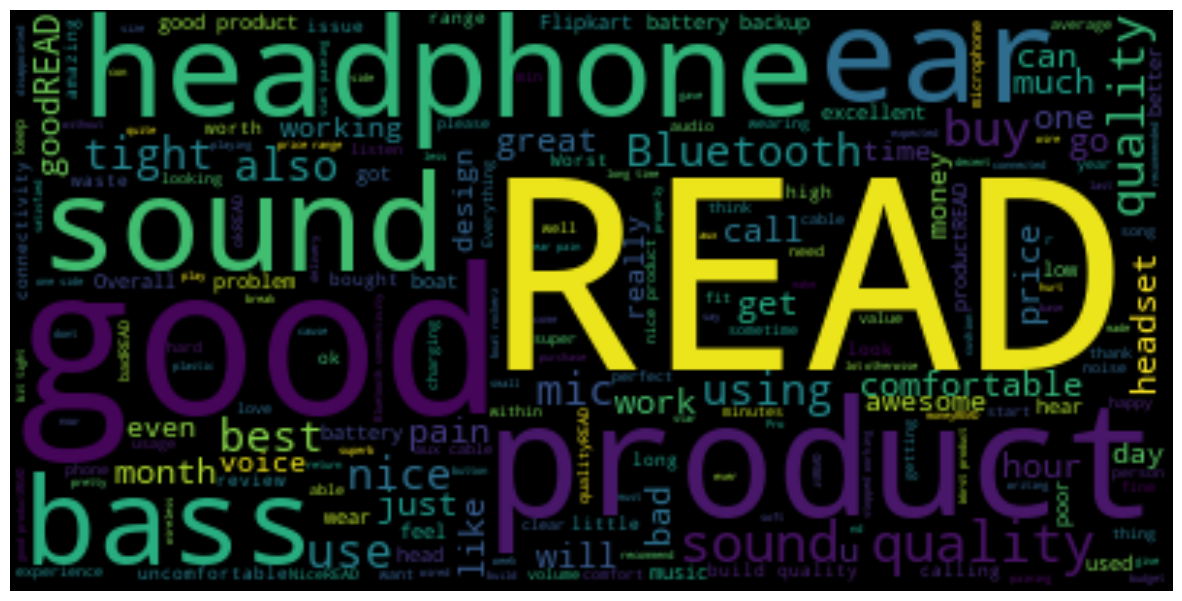

In [10]:
#Creating Stopwords list

stopwords = set(get_stop_words('english'))
stopwords.update(["br","href"])
textt = " ".join(review for review in df_reviews.review)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

From this we notice we have to remove the words 'read more', which aren't part of the reviews.

In [11]:
df_reviews.review.head()

1281    sound quality amazing Bess Super battery great...
5733             Awesome product I just loved itREAD MORE
5718    Value for moneySuperb bassBattery backup is be...
998     Nice Sound Great quality bass also great. Priz...
7388                              Good product 👍READ MORE
Name: review, dtype: object

In [12]:
for i, r in enumerate(df_reviews.review):
    df_reviews.review.iloc[i] = r.removesuffix("READ MORE")



In [13]:
df_reviews.review.head()

1281    sound quality amazing Bess Super battery great...
5733                      Awesome product I just loved it
5718    Value for moneySuperb bassBattery backup is be...
998     Nice Sound Great quality bass also great. Priz...
7388                                       Good product 👍
Name: review, dtype: object

Let's try the Wordcloud again.

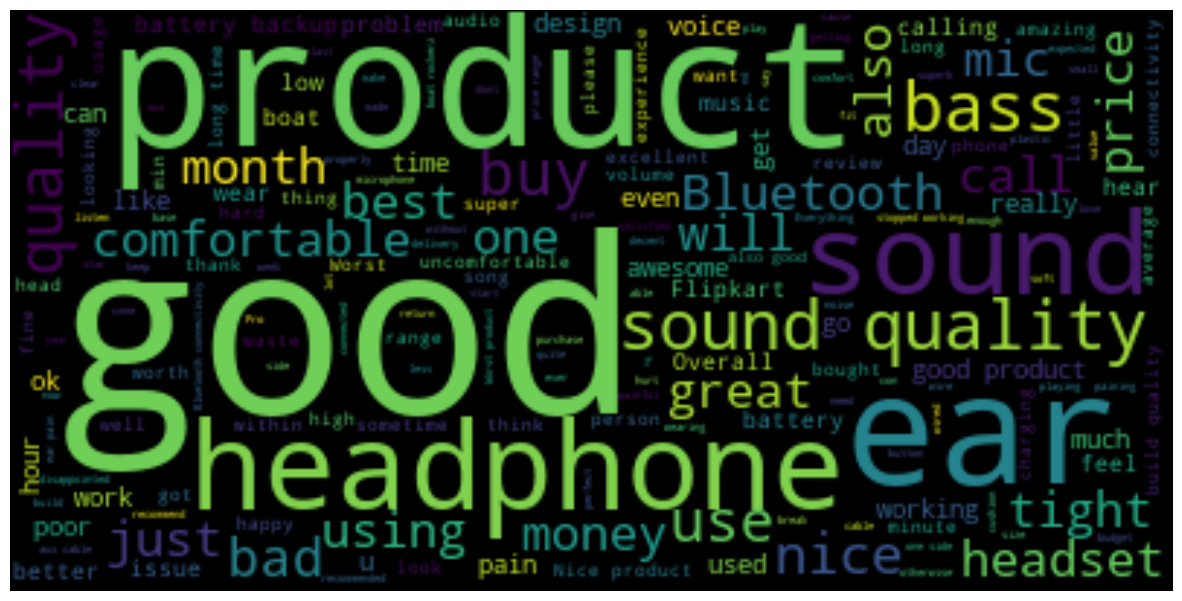

In [14]:
textt = " ".join(review for review in df_reviews.review)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

It seems overwhelmingly positive.

## Classifying Reviews

In [15]:
df_reviews_clean = df_reviews[df_reviews['rating'] != 3]
df_reviews_clean['sentiment'] = df_reviews['rating'].apply(lambda rating : +1 if rating > 3 else -1)
df_reviews_clean.sort_index(ascending=True)

,review,rating,sentiment
5,Awsome sound powerful bass battery backup is a...,5,1
14,Reson for 1 star : Sounds for alerts for conne...,1,-1
45,"Firstly, Thanks to Flipkart...I got the headph...",5,1
67,bass is very good brought the product for rs99...,5,1
72,Nice Sound Quality will give 4 out of 5Super B...,4,1
...,...,...,...
9907,Superb 👌👌👌👌Outstanding Sound and Long term Bat...,5,1
9912,Yaa!!.. Quite Happy with the Flipkart Service....,5,1
9923,Average,2,-1
9925,It is brilliant headphones and no ears are pai...,5,1


## More Data Analysis

In [16]:
# split df - positive and negative sentiment:
positive = df_reviews_clean[df_reviews_clean['sentiment'] == 1]
negative = df_reviews_clean[df_reviews_clean['sentiment'] == -1]

positive = positive.dropna()
negative = negative.dropna()

## Wordcloud - Positive

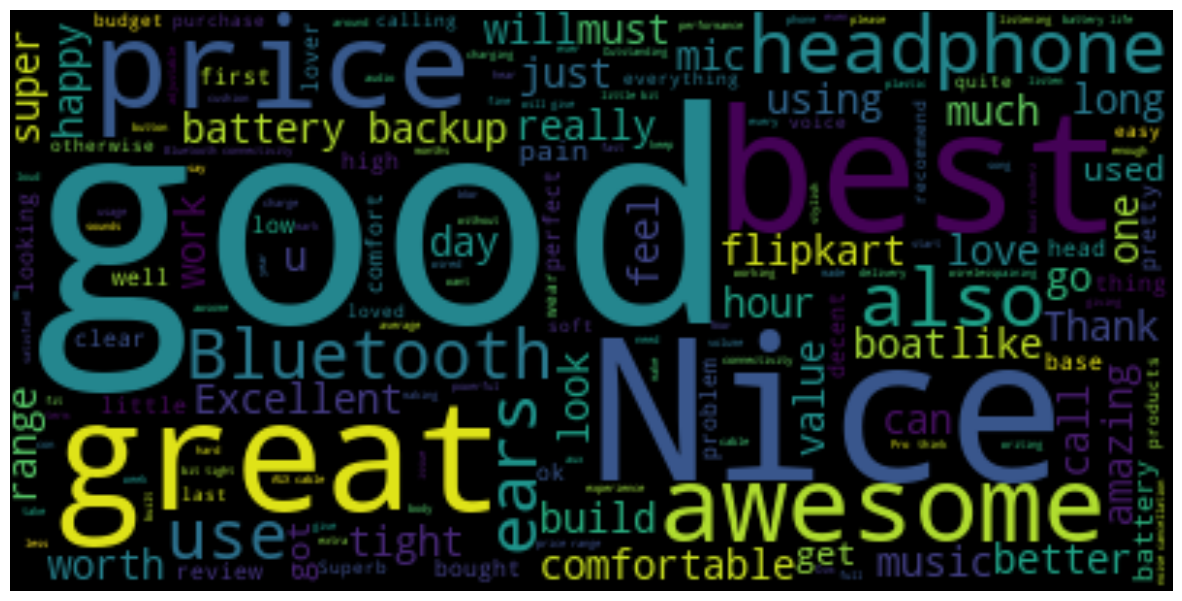

In [17]:
stopwords = set(get_stop_words('english'))
stopwords.update(["br", "buy", "month", "time", "money", "overall", "quality", "headset", "bass", "design", "quality", "ear", "sound", "bass", "bluetooh", "headphones", "product"]) 
pos = " ".join(review for review in positive.review)
wordcloud = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Wordcloud - Negative

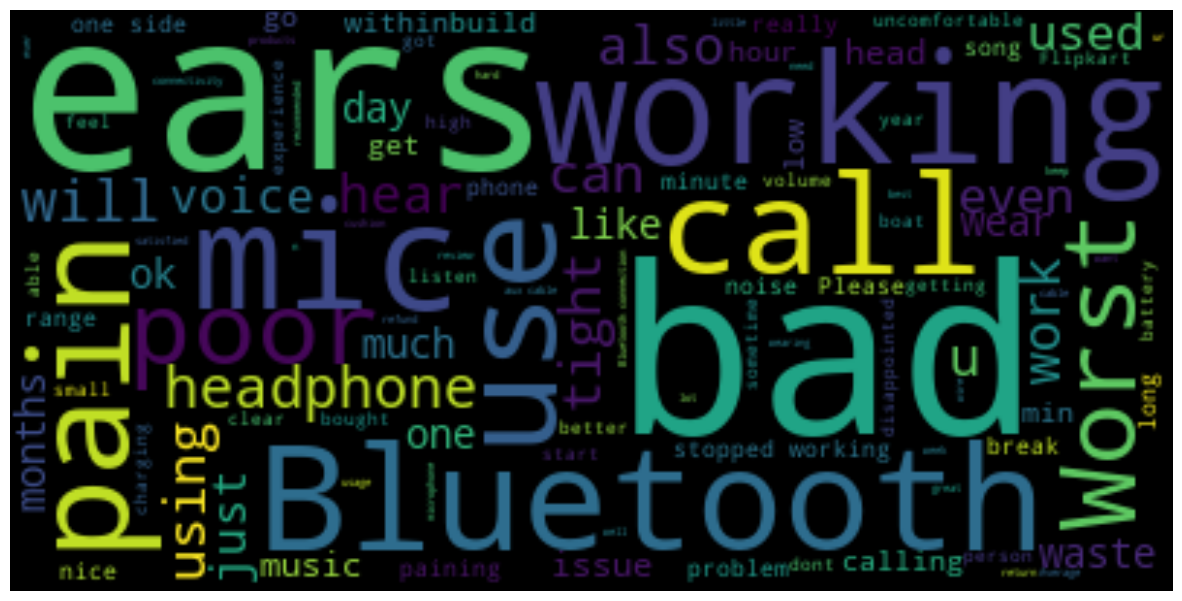

In [18]:
stopwords = set(get_stop_words('english'))
stopwords.update(["br", "good", "comfortable", "buy", "month", "time", "money", "overall", "quality", "headset", "bass", "design", "quality", "ear", "sound", "bass", "bluetooh", "headphones", "product"])
pos = " ".join(review for review in negative.review)
wordcloud = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The positive reviews included words such as **good**, **awesome**, **best**.

The negative ones had words like **bad**, **pain**, **worst**.

[Text(0.5, 1.0, 'Number of reviews per sentiment'),
 Text(0.5, 0, 'Sentiment'),
 Text(0, 0.5, 'Count')]

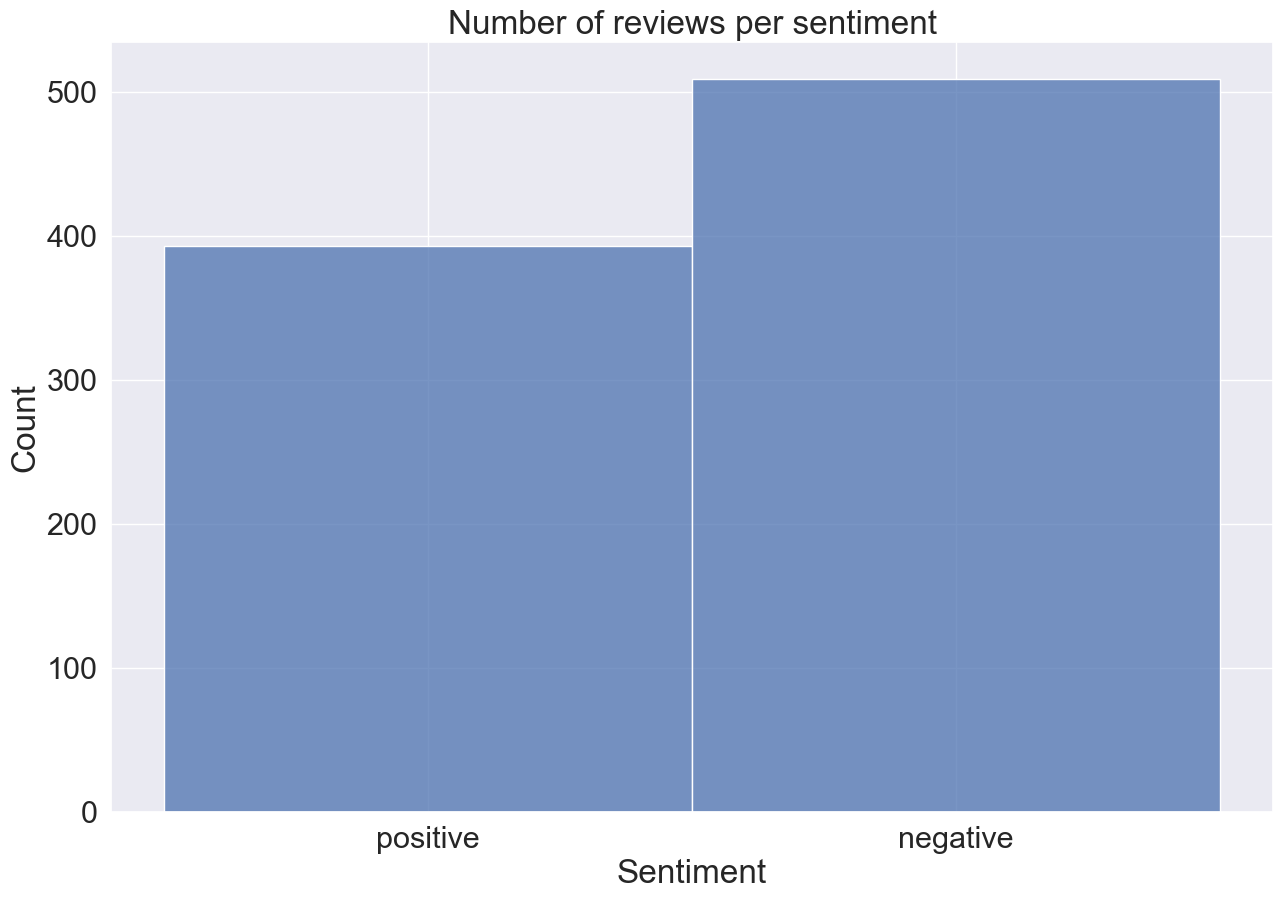

In [19]:
df_reviews_clean['sentiment'] = df_reviews_clean['sentiment'].replace({-1 : 'negative'})
df_reviews_clean['sentiment'] = df_reviews_clean['sentiment'].replace({1 : 'positive'})
plot = sns.histplot(df_reviews_clean, x="sentiment")
plot.set(title='Number of reviews per sentiment', 
         xlabel='Sentiment', 
         ylabel='Count')

## Sentiment Analysis

In [20]:
def get_subjectivity(twt):
    return TextBlob(twt).sentiment.subjectivity

def get_polarity(twt):
    return TextBlob(twt).sentiment.polarity
    
def get_sentiment(score):
    if score <0:
        return 'negative'
    if score ==0:
        return 'neutral'
    if score >0:
        return 'positive'

## Data Cleaning

In [21]:
#create a clean function
def clean_txt(txt):
    txt = re.sub('#[A-Za-z0-9]+', '', txt) #remove hastag
    txt = re.sub('@[A-Za-z0-9]+', '', txt) #remove tag
    txt = re.sub('_[A-Za-z0-9]+', '', txt) #remove tag
    txt = re.sub('https?:\/\/\S+', '', txt) #rmeove link
    txt = re.sub('\\n', '', txt) #remove /n
    txt = re.sub('[@.,;"?!\'():#$]', '', txt)
    txt = re.sub('  ', ' ', txt)
    txt = re.sub('   ', ' ', txt)
    txt = re.sub('&amp', ' ', txt)

    txt = txt.lower()

    txt = txt.strip() #remove space from right and left
    
    return txt

In [22]:
selected_cols = ['review', 'rating']
data = df_reviews[selected_cols]

stopwords = set(get_stop_words('english'))
data['review'] = data['review'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stopwords]))


data['review'] = data['review'].apply(clean_txt)

NameError: name 're' is not defined

In [ ]:
data.head()

,review,rating
1281,sound quality amazing bess super battery great...,5
5733,awesome product just loved,5
5718,value moneysuperb bassbattery backup better ex...,5
998,nice sound great quality bass also great prize...,5
7388,good product 👍,5


In [ ]:
data['Subjectivity'] = data['review'].apply(get_subjectivity) 
data['Polarity'] = data['review'].apply(get_polarity)
data['Sentiment'] = data['Polarity'].apply(get_sentiment)

In [ ]:
data.head(10)

,review,rating,Subjectivity,Polarity,Sentiment
1281,sound quality amazing bess super battery great...,5,0.603333,0.626667,positive
5733,awesome product just loved,5,0.900000,0.850000,positive
5718,value moneysuperb bassbattery backup better ex...,5,0.500000,0.500000,positive
998,nice sound great quality bass also great prize...,5,0.733333,0.575000,positive
7388,good product 👍,5,0.600000,0.700000,positive
6887,rockerz 400 blutooth headset best choice price...,5,0.300000,1.000000,positive
6898,sound good can feel bass music,5,0.500000,0.316667,positive
9136,good nice one🥰,5,0.800000,0.650000,positive
5,awsome sound powerful bass battery backup also...,5,0.674510,0.391176,positive
2452,best headphones 😍,5,0.300000,1.000000,positive


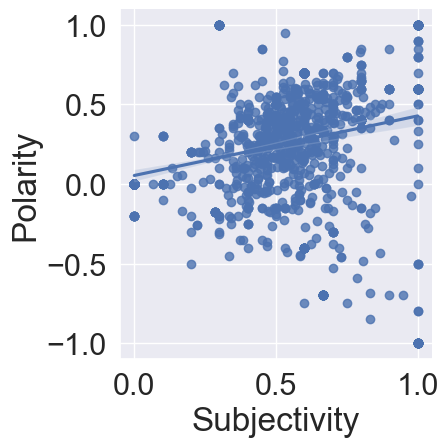

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
sns.set(font_scale=2)

plot = sns.lmplot(data=data, x="Subjectivity", y="Polarity")
plot.set(
         xlabel='Subjectivity', 
         ylabel='Polarity')

In [ ]:
data.groupby(['Sentiment'])['rating'].value_counts(normalize=True)

Sentiment  rating
negative   1         0.568720
           2         0.270142
           3         0.118483
           4         0.042654
neutral    1         0.451613
           2         0.322581
           4         0.122581
           3         0.070968
           5         0.032258
positive   5         0.279431
           4         0.265201
           3         0.183700
           2         0.163001
           1         0.108668
Name: rating, dtype: float64

In [ ]:
data["Text_list"] = data['review'].str.lower().str.replace('[^\w\s]','')

df_word_count = data['Text_list'].str.split(expand=True).stack().value_counts().reset_index()

In [ ]:
count = 0
for word in df_word_count['index']:
    if word == "bad": print(df_word_count[0][count])
    count += 1

81


In [ ]:
df_word_count.head()

,index,0
0,good,510
1,product,336
2,quality,328
3,sound,307
4,bass,169


In [ ]:
df_word_count = df_word_count.loc[df_word_count['index'].str.len()>=3]

<AxesSubplot: xlabel='index', ylabel='0'>

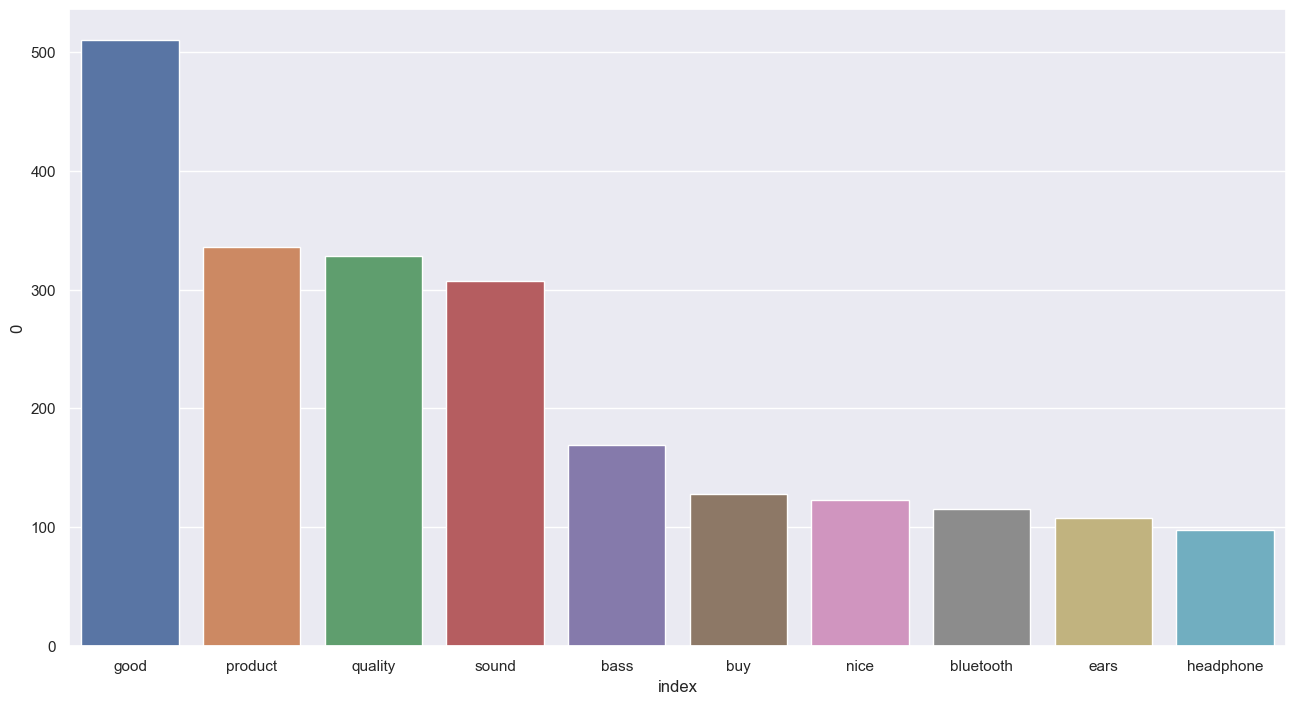

In [ ]:
sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.barplot(x='index', y = 0, data=df_word_count[:10])

## Sentiment Analysis using VADER

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
sentiment = SentimentIntensityAnalyzer()

In [ ]:
data.head()

,review,rating,Subjectivity,Polarity,Sentiment,Text_list
1281,sound quality amazing bess super battery great...,5,0.603333,0.626667,positive,sound quality amazing bess super battery great...
5733,awesome product just loved,5,0.900000,0.850000,positive,awesome product just loved
5718,value moneysuperb bassbattery backup better ex...,5,0.500000,0.500000,positive,value moneysuperb bassbattery backup better ex...
998,nice sound great quality bass also great prize...,5,0.733333,0.575000,positive,nice sound great quality bass also great prize...
7388,good product 👍,5,0.600000,0.700000,positive,good product


In [ ]:
def get_compound_info(record):
    vader_res = sentiment.polarity_scores(record)
    return vader_res['compound']

In [ ]:
data['compound'] = data['review'].apply(lambda x: get_compound_info(x))

In [ ]:
data.groupby('rating')['compound'].mean().reset_index()

,rating,compound
0,1,-0.152080
1,2,0.056733
2,3,0.308411
3,4,0.591478
4,5,0.658243
